In [1]:
%matplotlib inline

In [187]:
# import 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import scipy as sp
from  numpy.fft import fft2, fftshift

In [188]:
image = np.flipud(plt.imread('ExamplePattern2.tiff'))

In [43]:
params = {'w' : 60,
          'dL' : 10,
          'minL' : 5, 
          'maxL' : 18}

params = pd.Series(params)

In [44]:
params

dL      10
maxL    18
minL     5
w       60
dtype: int64

In [45]:

params['M'] = (image.shape[0] - params['w'])/params['dL'] + 1  # number of rows in window array
params['N'] = (image.shape[1] - params['w'])/params['dL'] + 1 # number of columns in window array
params['O'] = params['M']+params['w']/params['dL']-1 # M+w/dL-1; number of row steps in the image
params['P'] = params['N']+params['w']/params['dL']-1; #  N+w/dL-1; number of column steps in the image
# params.n = params.w/params.dL; %w/dL; number of steps in a window


In [46]:
image = np.array(image, dtype =  float)

In [47]:
import time
start_time = time.time()

In [48]:
# [Lwin,Dwin] = LPPwindow(image,params,i,j); %calculate properties of the window

In [49]:
w = params['w']
dL = params['dL']
minL = params['minL']
maxL = params['maxL']

In [50]:
i = 1
j = 1

In [51]:
#  LLPwindow
# get power spectrum
im_hold = image[dL*(i-1):dL*(i-1)+w,dL*(j-1):dL*(j-1)+w] #retrieve the window
image_window = im_hold - np.mean(im_hold) # subtract the mean from the window
imfft = fftshift(fft2(image_window))
fftpower = abs(imfft)**2

# Find radial total power and angular average power

# note: image must be square
mindim = min(fftpower.shape)
fmin_index = mindim/1./maxL  # minimum allowable frequency
fmax_index = mindim/1./minL  # maximum allowable frequency

dimy = fftpower.shape[0]
dimx = fftpower.shape[1]

In [126]:
x = np.arange(-dimx/2., dimx/2.)
y = np.arange(-dimy/2., dimy/2.)

In [144]:
[X,Y] = np.meshgrid(x, y)
aa = np.arctan(Y/X)
aa[X<0] = aa[X<0] + np.pi
aa[aa<0] = aa[aa<0] + 2*np.pi # grid of angles 0 to 2pi
rr = np.sqrt(X**2 + Y**2)    # grid of radii

rtol = 1.5 #  rtol is the tolerance for a specified radius (frequency) it is needed to smooth the results due to the binning of the power spectrum. the radial increment is 1.
dtol = np.pi/16 # dth is the tolerance on the angle. or 2*dtol is the width of the sliver. it is also the width of the angle increment



In [145]:
theta = np.arange( dtol, np.pi+dtol, dtol)

In [148]:
# DETERMINE ANGULAR AVERAGE POWER
pow_avg_th = np.zeros(theta.shape)
for k in range(len(theta)): # iterate from zero to pi
    # find points that lie within sliver
    index = (aa >= theta[k]-dtol) &  (aa  < theta[k]+dtol) & (rr >= fmin_index) & (rr <= fmax_index)
    pts_th = fftpower[index]
    pow_avg_th[k] = np.mean(pts_th)



In [162]:
pow_tot_r = np.zeros(radii.shape)
pow_a_r = np.zeros(radii.shape)

# DETERMINE RADIAL TOTAL POWER
radii = np.arange(np.ceil(fmin_index)-1,np.floor(fmax_index)+1+1) # NOTE: 1 extra point on each side
for r in range(len(radii)):
    index = (rr < radii[r]+rtol) & (rr >= radii[r]-rtol)
    pts_r = fftpower[index]
    pow_tot_r[r] = np.sum(pts_r) #mean(pts_r);
    pow_a_r[r] = np.mean(pts_r)



In [178]:
#  CHECK FOR VALID WINDOW
#  Check to ensure that each window has exactly 1 radial and angular power maximum
valid_window =  (len(pow_tot_r[np.max(pow_tot_r) == pow_tot_r]) == 1) & \
                (len(pow_avg_th[np.max(pow_avg_th) == pow_avg_th]) == 1 ) 

In [179]:
# if valid_window
#  CALCULATE WAVELENGTH, DIRECTION, UNIQUENESS, MEAN & MAX POWER
#  [th_a,r_t] = FFTcalcs(fftpower,pow_avg_th,pow_tot_r,radii,theta,minL,maxL);
# MAX THETA AND R
th_a.th_indmax = find(max(pow_avg_th) == pow_avg_th);
th_a.th_max = theta(th_a.th_indmax); %theta max
r_t.r_indmax = find(max(pow_tot_r) == pow_tot_r);
r_t.r_max = radii(r_t.r_indmax); % r max


True

In [184]:
max(pow_avg_th) == pow_avg_th

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False], dtype=bool)

In [185]:
im_hold.shape

(60, 60)

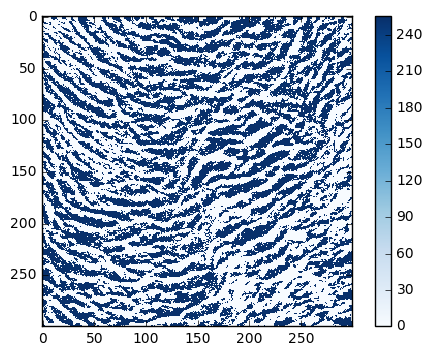

In [190]:
plt.imshow(image, cmap = 'Blues', interpolation='none')
plt.colorbar()